## Import Libraries and Read the CSV File

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("PortoTaxiDataTraining_7734.csv", engine='python', error_bad_lines=False)
df.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1.372640e+18,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643, 41.141412], [-8.618499, 41.141376..."
1,1.372640e+18,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847, 41.159825999999995], [-8.64035099..."
2,1.372640e+18,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964, 41.140359000000004], [-8.613378, ..."
3,1.372640e+18,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678, 41.151951], [-8.574705, 41.151942..."
4,1.372640e+18,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994, 41.18049], [-8.645949, 41.180517]..."


In [3]:
df.dtypes

TRIP_ID         float64
CALL_TYPE        object
ORIGIN_CALL     float64
ORIGIN_STAND    float64
TAXI_ID           int64
TIMESTAMP         int64
DAY_TYPE         object
MISSING_DATA       bool
POLYLINE         object
dtype: object

In [4]:
df.CALL_TYPE.unique()

array(['C', 'B', 'A'], dtype=object)

In [5]:
df['CALL_TYPE'].value_counts()

B    3982
C    1898
A    1853
Name: CALL_TYPE, dtype: int64

In [6]:
len(df)

7733

## Calculate the Proportions

In [7]:
class prop_calculator():
    def __init__(self, prop_num, sample_num):
        self._prop = prop_num
        self._samples = sample_num
        
    def sample_prop(self):
        return round(self._prop / self._samples, 5)
    
    def sigma_calc(self, p_hat = None):
        if p_hat == None:
            p_hat = self.sample_prop()
        return round(np.sqrt((p_hat * (1 - p_hat)) / self._samples), 5)
    
    def confidence_interval(self, p_hat = None, sigma_hat = None):
        if p_hat == None:
            p_hat = self.sample_prop()
            sigma_hat = self.sigma_calc(p_hat)
        return round(p_hat - 1.96 * sigma_hat, 5), round(p_hat + 1.96 * sigma_hat, 5)

In [8]:
a_num = 1853
b_num = 3982
c_num = 1898
total_sample_num = 7733

In [9]:
#A
a_cal = prop_calculator(1853, 7733)
a_ratio = a_cal.sample_prop()
print("Central Based")
# print("Population Proportion:", a_ratio)
print("Confidence Interval:", a_cal.confidence_interval())

#B
b_cal = prop_calculator(3982, 7733)
b_ratio = b_cal.sample_prop()
print("Stand Based")
# print("Population Proportion:", b_ratio)
print("Confidence Interval:", b_cal.confidence_interval())

#C
c_cal = prop_calculator(1898, 7733)
c_ratio = c_cal.sample_prop()
print("Random Street")
# print("Population Proportion:", c_ratio)
print("Confidence Interval:", c_cal.confidence_interval())

Central Based
Confidence Interval: (0.23011, 0.24913)
Stand Based
Confidence Interval: (0.50381, 0.52607)
Random Street
Confidence Interval: (0.23586, 0.25502)


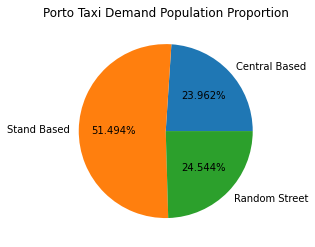

In [10]:
# draw pie charts
import matplotlib.pyplot as plt
ratio = [a_ratio, b_ratio, c_ratio]
labels = ["Central Based", "Stand Based", "Random Street"]

plt.pie(ratio, labels = labels, autopct='%.3f%%')
plt.title("Porto Taxi Demand Population Proportion")
plt.show()

In [11]:
import scipy as sp
import scipy.stats

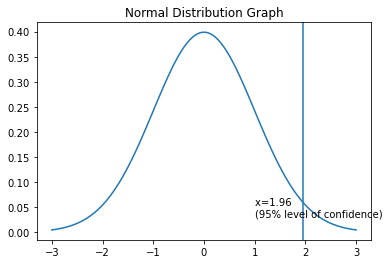

In [38]:
m = 0
s = 1

x = np.linspace(m-3*s, m+3*s, 100)
y = sp.stats.norm.pdf(x, m, s)
plt.plot(x, y)
plt.title("Normal Distribution Graph")
plt.axvline(x=1.96)
plt.text(1.0, 0.03, 'x=1.96 \n(95% level of confidence)')
plt.show()